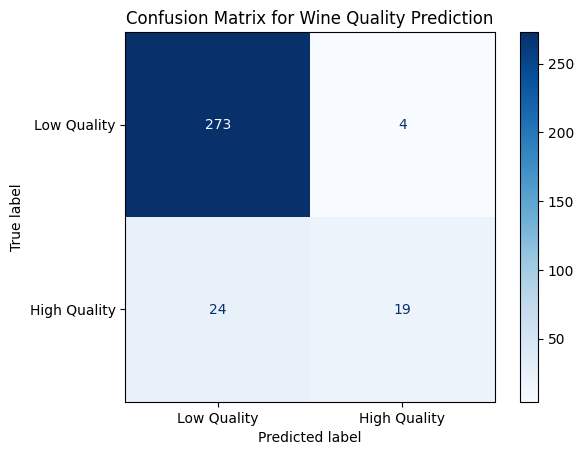

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

file_path = '/content/winequality-red.csv'
wine_data = pd.read_csv(file_path)

wine_data['high_quality'] = wine_data['quality'] >= 7

X = wine_data.drop(['quality', 'high_quality'], axis=1)
y = wine_data['high_quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Quality', 'High Quality'])

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Wine Quality Prediction')
plt.show()


In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

error_rate = 1 - accuracy
print(f"Error Rate: {error_rate:.2f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

cm = confusion_matrix(y_test, y_pred, labels=[False, True])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Quality', 'High Quality'])



Accuracy: 0.91
Error Rate: 0.09
Precision: 0.83
Recall: 0.44


In [4]:
red_wine_path = '/content/winequality-red.csv'
red_wine_data = pd.read_csv(red_wine_path)

white_wine_path = '/content/winequality-white.csv'
white_wine_data = pd.read_csv(white_wine_path, sep = ';')

red_wine_data['wine_type'] = 'red'

white_wine_data['wine_type'] = 'white'

combined_wine_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)

combined_wine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


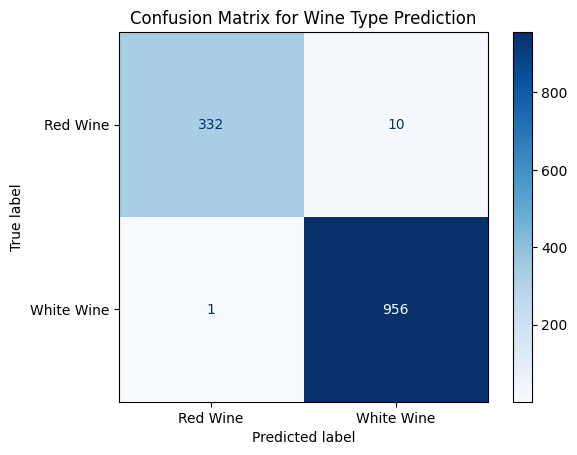

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X = combined_wine_data.drop(['quality', 'wine_type'], axis=1)
y = combined_wine_data['wine_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=['red', 'white'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Red Wine', 'White Wine'])

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Wine Type Prediction')
plt.show()


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

error_rate = 1 - accuracy
print(f"Error Rate: {error_rate:.2f}")

precision = precision_score(y_test, y_pred, pos_label='white')
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred, pos_label='white')
print(f"Recall: {recall:.2f}")

cm = confusion_matrix(y_test, y_pred, labels=['red', 'white'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Red Wine', 'White Wine'])


Accuracy: 0.99
Error Rate: 0.01
Precision: 0.99
Recall: 1.00
